# Minería de textos

### Docente: M.Sc. Richard Fernández

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import re
import string
import io
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# pysentimiento: A multilingual toolkit for Sentiment Analysis and SocialNLP tasks
En esta notebook mostramos un breve ejemplo de cómo usar pysentimiento, un toolkit multilingual para extracción de opiniones y análisis de sentimientos (aunque centrado en el idioma español)

pysentimiento es un una librería que utiliza modelos pre-entrenados de transformers para distintas tareas de SocialNLP. Usa como modelos bases a BETO y RoBERTuito en Español, y BERTweet en inglés.

--

In this notebook we show a brief example of how to use pysentimiento, a multilingual toolkit for opinion mining and sentiment analysis.

pysentimiento is a library that uses pre-trained models of [transformers] (https://github.com/huggingface/transformers) for different SocialNLP tasks. It uses as base models [BETO] (https://github.com/dccuchile/beto) and [RoBERTuito] (https://github.com/pysentimiento/robertuito) in Spanish, and BERTweet in English.

In [2]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 6.8 MB/s 
     |████████████████████████████████| 4.2 MB 54.4 MB/s 
     |████████████████████████████████| 175 kB 50.6 MB/s 
     |████████████████████████████████| 140 kB 43.2 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 1.1 MB 58.1 MB/s 
     |████████████████████████████████| 212 kB 60.9 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 127 kB 59.7 MB/s 
     |████████████████████████████████| 6.6 MB 42.9 MB/s 
     |████████████████████████████████| 144 kB 72.2 MB/s 
     |████████████████████████████████| 271 kB 40.8 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=2abdcc1b548329aa8507d1ec54469eba28ce3db2111605b032dd0b532b7fef61
  S

Let's create an analyzer. The `create_analyzer` receives the task and the language as parameters (currently supports "es" and "en").

In [3]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

Downloading:   0%|          | 0.00/334 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/838k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/925 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/415M [00:00<?, ?B/s]

In [4]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import tweepy

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAALKFdQEAAAAAZhYsoO71S7SKd3yf9ZyRCR7MHRc%3DP5n2zSbAU9YE6C80qAlL7cyZ4WNEITrcoQhCRH5xkCNDzLneTb')

In [6]:
#Cambiar por el nombre de usuario: JorgeMunozPe MartinVizcarraC
response = client.get_users(usernames="JorgeMunozPe")
for user in response.data:
    id_user = user.id
    print(id_user)

163504378


In [7]:
tweets = client.get_users_tweets(id_user, tweet_fields=['context_annotations','created_at','geo'], max_results=100)

i = 0
tweet_list = []

for tweet in tweets.data:
  tweet_list.append(tweet.text)
  i = i + 1
  print(i, tweet) 

1 Por eso, es un gran orgullo saber que "Barrios turísticos", estrategia aprobada por decreto de Alcaldía el 2021, le ha merecido a Lima el premio @UCCI_SG a la innovación iberoamericana. Esta iniciativa es hoy un ejemplo de política pública para el Perú e Iberoamérica. (3/3) https://t.co/N4kg5d3Yde
2 Lugares como el barrio de Leticia, Monserrate y lomas El Mirador, fueron intervenidos por los propios vecinos y nuestro incansable equipo de trabajo, abriendo paso a esa locomotora silenciosa que es el #turismo, indispensable para la reactivación económica de las familias. (2/3) https://t.co/Gu4MEaP0wB
3 Cada uno de nosotros es embajador de nuestras costumbres e historia. Con eso en mente, desde el inicio de nuestra gestión municipal, buscamos generar esa apropiación e identidad con nuestros espacios a través de la estrategia "Barrios turísticos". (1/3) https://t.co/Lx0oVWxYln
4 Vecinos, en esta entrevista con @esquinabaja para el programa #Políticas, hablamos del doble rasero del gobiern

In [8]:
text_df = pd.DataFrame(data = [tweet.text for tweet in tweets.data],columns=['tweet'])
text_df.head(20)

,tweet
0,"Por eso, es un gran orgullo saber que ""Barrios..."
1,"Lugares como el barrio de Leticia, Monserrate ..."
2,Cada uno de nosotros es embajador de nuestras ...
3,"Vecinos, en esta entrevista con @esquinabaja p..."
4,Me queda en la memoria el recuerdo de nuestras...
5,Me embarga una pena muy grande saber que Lucy ...
6,"Los detractores se basarán en una foto, en un ..."
7,"Una obra que soñamos, ejecutamos y que ya es u..."
8,Juzguen ustedes: ¿hay doble rasero? Para los a...
9,RT @EdwarDiazV: La propuesta presentada por @J...


In [9]:
sentimientos = []
sentimientos_porcentaje = []

s=0
for x in text_df['tweet']:
  result = analyzer.predict(x)
  senti = result.output
  senti_ptj = result.probas[senti]*100
  if senti == 'NEU':
    senti = 'Neutral'
  elif senti == 'POS':
    senti = 'Positivo'
  else:
    senti = 'Negativo'

  sentimientos.append(senti) 
  sentimientos_porcentaje.append(senti_ptj) 
  s=s+1

  #print(s,x,senti, senti_ptj)

In [10]:
text_df['Sentimientos'] = sentimientos
text_df['Score'] = sentimientos_porcentaje
text_df.head(15)

,tweet,Sentimientos,Score
0,"Por eso, es un gran orgullo saber que ""Barrios...",Positivo,98.418158
1,"Lugares como el barrio de Leticia, Monserrate ...",Neutral,67.839992
2,Cada uno de nosotros es embajador de nuestras ...,Positivo,77.070946
3,"Vecinos, en esta entrevista con @esquinabaja p...",Neutral,73.629856
4,Me queda en la memoria el recuerdo de nuestras...,Positivo,87.041479
5,Me embarga una pena muy grande saber que Lucy ...,Negativo,97.189832
6,"Los detractores se basarán en una foto, en un ...",Neutral,66.685754
7,"Una obra que soñamos, ejecutamos y que ya es u...",Positivo,87.180662
8,Juzguen ustedes: ¿hay doble rasero? Para los a...,Negativo,99.291033
9,RT @EdwarDiazV: La propuesta presentada por @J...,Neutral,98.668659


In [11]:
positive = text_df[text_df['Sentimientos'] == 'Positivo']
print(str(positive.shape[0]/(text_df.shape[0])*100) + " % de tweets positivos")

18.0 % de tweets positivos


In [12]:
negative = text_df[text_df['Sentimientos'] == 'Negativo']
print(str(negative.shape[0]/(text_df.shape[0])*100) + " % de tweets negativos")

11.0 % de tweets negativos


In [13]:
neutral = text_df[text_df['Sentimientos'] == 'Neutral']
print(str(neutral.shape[0]/(text_df.shape[0])*100) + " % de tweets neutrales")

71.0 % de tweets neutrales


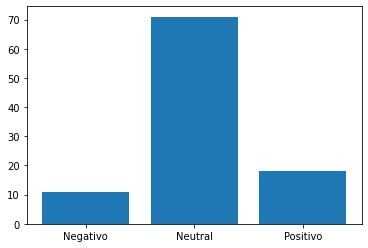

In [14]:
labels = text_df.groupby('Sentimientos').count().index.values
values = text_df.groupby('Sentimientos').size().values
plt.bar(labels, values)
plt.show()

In [23]:
def cleanUpTweet(txt):
  txt = re.sub(r'RT ','',txt) #remueve retweets
  txt = txt.lower() #convierte a minúscula
  txt = re.sub(r'http\S+','',txt) #remueve páginas web
  txt = re.sub(r'http?:\/\/[A-Za-z0-9\.\/]+','',txt) #remueve urls
  txt = re.sub(r'www.\S+','',txt) #remueve www.
  txt = txt.translate(str.maketrans(r'[áéíóúÁÉÍÓÚ]', r'[aeiouAEIOU]')) # Remueve tíldes
  #txt = txt.translate(str.maketrans(r'[ñÑ]', r'[nN]')) # Remueve ñs
  txt = re.sub(r'@[A-Za-z0-9_]+','',txt) #remueve menciones
  txt = re.sub(r'([@#][A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','',txt) #remueve hashtags
  txt = re.sub(r'(RT|RT |retweet|from|via)((?:\\b\\W*@\\w+)+)','',txt) #remueve retweets
  txt = re.sub(r'\[.*?\]','',txt) #remueve caracteres especiales
  txt = re.sub(r'\n','',txt) #remueve \n
  txt = re.sub(r'[%s]' % re.escape(string.punctuation),'',txt) #remueve puntos
  txt = re.compile(r'\b(' + r'|'.join(stopwords.words('spanish')) + r')\b\s*').sub('',txt) #remueve stopwords
  txt = re.sub(r"\\s+",' ',txt) #remueves espacios en blanco
  txt = re.sub(r" el | la | lo | ellos | ella | ellas | las | los | un | unas | unos | los ",' ',txt) #remueves articulos
  txt = re.sub(r" a | ante | bajo | cabe | con | contra | de | desde | durante | en | entre | hacia | hasta | mediante | para | por | según | sin | sobre | tras ",' ',txt) #remueves preposiciones
  txt = re.sub(r" ni | y | sino | tambien | tanto | como | igual | mismo | pero | mas | o | mientras | que | av | toda ",' ',txt) #remueves conjunciones
  return txt

In [24]:
text_df['text_clean'] = text_df['tweet'].apply(cleanUpTweet)
text_df.head(20)

,tweet,Sentimientos,Score,text_clean
0,"Por eso, es un gran orgullo saber que ""Barrios...",Positivo,98.418158,gran orgullo saber barrios turisticos estrateg...
1,"Lugares como el barrio de Leticia, Monserrate ...",Neutral,67.839992,lugares barrio leticia monserrate lomas mirado...
2,Cada uno de nosotros es embajador de nuestras ...,Positivo,77.070946,cada embajador costumbres historia mente inici...
3,"Vecinos, en esta entrevista con @esquinabaja p...",Neutral,73.629856,vecinos entrevista programa hablamos doble ra...
4,Me queda en la memoria el recuerdo de nuestras...,Positivo,87.041479,queda memoria recuerdo conversaciones cada vez...
5,Me embarga una pena muy grande saber que Lucy ...,Negativo,97.189832,embarga pena grande saber lucy pacheco falleci...
6,"Los detractores se basarán en una foto, en un ...",Neutral,66.685754,detractores basaran foto momento especifico di...
7,"Una obra que soñamos, ejecutamos y que ya es u...",Positivo,87.180662,obra soamos ejecutamos realidad paso desnivel ...
8,Juzguen ustedes: ¿hay doble rasero? Para los a...,Negativo,99.291033,juzguen ustedes doble rasero amigos gobierno t...
9,RT @EdwarDiazV: La propuesta presentada por @J...,Neutral,98.668659,propuesta presentada 2020 consiste dividir li...


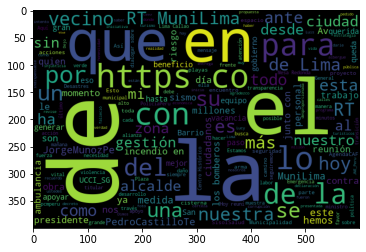

In [17]:
words = ' '.join([tweet for tweet in text_df['tweet']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

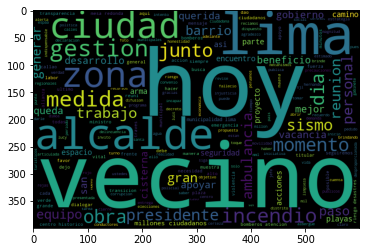

In [25]:
words = ' '.join([tweet for tweet in text_df['text_clean']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [19]:
#Tarea
#1. Analizar las asociaciones
#2. Crear cluster de palabras